In [5]:
using Roots,Plots;
using NLsolve;

In [27]:
# set default values for the pyplot backend of Plots
pyplot(frame=:box, minorticks=5, size=(500,350), titlefont = (11,"serif"), 
    guidefont = (12,"serif"), tickfont = (11,"serif"), legendfont= (9, "serif"),
    bg_color_legend = RGBA(1,1,1,0.15), markerstrokecolor= :auto) 

Plots.PyPlotBackend()

In [43]:
mDn=1.86484;
mDc=1.86961;
mπc=0.139570;
mπn=0.1349766;
mDsc=2.01026;
mDsn=2.00696;
mD1=2.422;
mDs=(mDsc+mDsn)/2;
mπ_av=(2*mπc+mπn)/3;

In [17]:
mDsc-mDn-mπc|>println
mDsn-mDn-mπn|>println
mDsn-mDc-mπc|>println

0.005850000000000105
0.0071433999999998
-0.0022200000000001385


In [3]:
λ(x,y,z)=x^2+y^2+z^2-2*x*y-2*x*z-2*y*z

λ (generic function with 1 method)

# Feynman description

0.0016671914999850657 - 1.1100091488059748e-16im


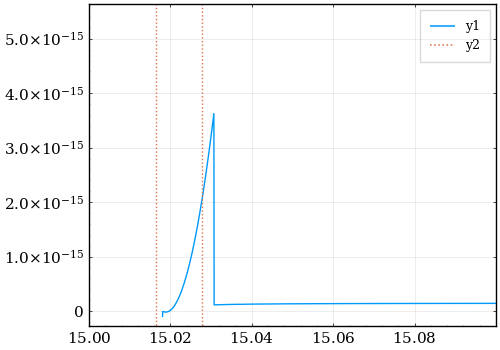

In [28]:
let
    m1,m2,m3,m4=mDn,mDsc,mDn,mDsc
    mπ=mπc
    function func(x;z=0.0)
        s=x[1]+im*x[2]
        psq1,psq2=λ(s,m3^2,m4^2)/(4*s),λ(s,m1^2,m2^2)/(4*s)
        tmp=sqrt(λ(s,m3^2,m4^2)*λ(s,m1^2,m2^2)+im*eps())/(2*s)
        res=(m4^2-m3^2-m1^2+m2^2)^2/(4*s)-psq1-psq2+tmp*z-mπ^2
        reim(res)
    end
    
    function s_root(z)
        _sol=nlsolve(x->func(x;z=z),[(m1+m2)^2,0.0])
        _sol.residual_norm < 1e-8 ? complex(_sol.zero[1], _sol.zero[2]) : NaN+1im*NaN
    end
    
    s_root(-1)-(m1+m2)^2|>println
    
    zv=collect(-1:0.001:1.0)
    cv=s_root.(zv)
    plot(real.(cv),imag.(cv),arrow=true,xlims=(15,15.1))
    vline!([(mDn+mDsc)^2,(mDc+mDsn)^2],ls=:dot)
end

NaN + NaN*im


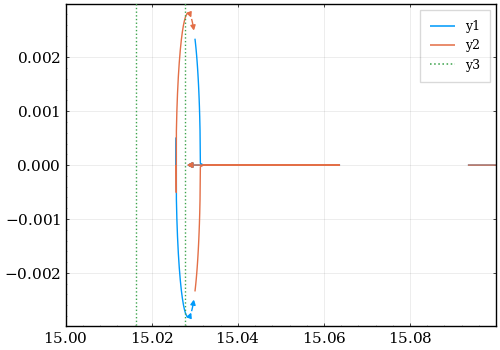

In [29]:
let
    m1,m2,m3,m4=mDn,mDsc,mDc,mDsn
    mπ=mπn
    
    function func(x;z=0.0)
        s=x[1]+im*x[2]
        psq1,psq2=λ(s,m3^2,m4^2)/(4*s),λ(s,m1^2,m2^2)/(4*s)
        tmp=sqrt(λ(s,m3^2,m4^2)*λ(s,m1^2,m2^2)+im*eps())/(2*s)
        res=(m4^2-m3^2-m1^2+m2^2)^2/(4*s)-psq1-psq2+tmp*z-mπ^2
        reim(res)
    end
    
    function func_conj(x;z=0.0)
        s=x[1]-im*x[2]
        psq1,psq2=λ(s,m3^2,m4^2)/(4*s),λ(s,m1^2,m2^2)/(4*s)
        tmp=sqrt(λ(s,m3^2,m4^2)*λ(s,m1^2,m2^2)+im*eps())/(2*s)
        res=(m4^2-m3^2-m1^2+m2^2)^2/(4*s)-psq1-psq2+tmp*z-mπ^2
        reim(res)
    end
    
    function s_root(z)
        _sol=nlsolve(x->func(x;z=z),[(m1+m2)^2,0.0])
        _sol.residual_norm < 1e-8 ? complex(_sol.zero[1], _sol.zero[2]) : NaN+1im*NaN
    end
    
    function s_root_conj(z)
        _sol=nlsolve(x->func_conj(x;z=z),[(m1+m2)^2,0.0])
        _sol.residual_norm < 1e-8 ? complex(_sol.zero[1], _sol.zero[2]) : NaN+1im*NaN
    end
    
    s_root(-1)-(m1+m2)^2|>println
    
    zv=collect(-1:0.002:1.0)
    cv=s_root.(zv)
    cv_conj=s_root_conj.(zv)
    plot(real.(cv),imag.(cv),arrow=true,xlims=(15,15.1))
    plot!(real.(cv_conj),imag.(cv_conj),arrow=true,xlims=(15,15.1))
    vline!([(mDn+mDsc)^2,(mDc+mDsn)^2],ls=:dot)
end

-0.47426207974626244 - 3.2748151112878193e-16im


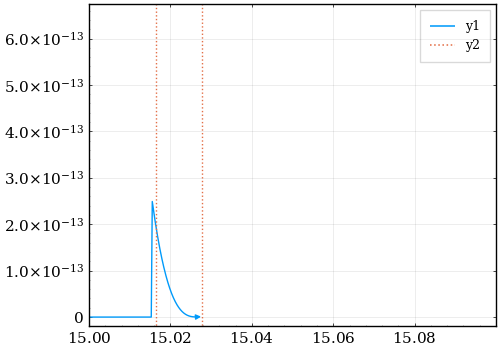

In [30]:
let
    m1,m2,m3,m4=mDc,mDsn,mDc,mDsn
    mπ=mπc
    
    function func(x;z=0.0)
        s=x[1]+im*x[2]
        psq1,psq2=λ(s,m3^2,m4^2)/(4*s),λ(s,m1^2,m2^2)/(4*s)
        tmp=sqrt(λ(s,m3^2,m4^2)*λ(s,m1^2,m2^2)+im*eps())/(2*s)
        res=(m4^2-m3^2-m1^2+m2^2)^2/(4*s)-psq1-psq2+tmp*z-mπ^2
        reim(res)
    end
    
    function s_root(z)
        _sol=nlsolve(x->func(x;z=z),[(m1+m2)^2,0.0])
        _sol.residual_norm < 1e-8 ? complex(_sol.zero[1], _sol.zero[2]) : NaN+1im*NaN
    end
    
    s_root(-1)-(m1+m2)^2|>println
    
    zv=collect(-1:0.002:1.0)
    cv=s_root.(zv)
    plot(real.(cv),imag.(cv),arrow=true,xlims=(15,15.1))
    vline!([(mDn+mDsc)^2,(mDc+mDsn)^2],ls=:dot)
end

# TOPT

1.285189467967907 - 2.0050117391316482e-14im


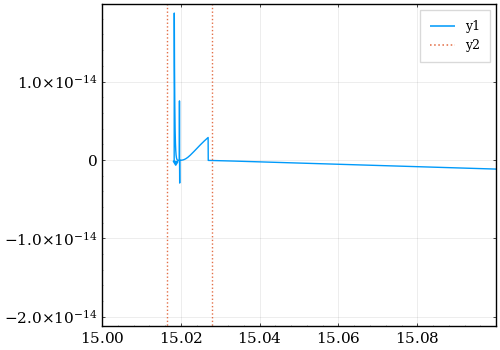

In [32]:
let
    m1,m2,m3,m4=mDn,mDsc,mDn,mDsc
    mπ=mπc
    function gunc(x;z=0.0)
        s=x[1]+im*x[2]
        psq1,psq2=λ(s,m3^2,m4^2)/(4*s),λ(s,m1^2,m2^2)/(4*s)
        tmp=sqrt(λ(s,m3^2,m4^2)*λ(s,m1^2,m2^2)+im*eps())/(2*s)
        res=sqrt(s+im*eps())-sqrt(m3^2+psq1+im*eps())-sqrt(m1^2+psq2+im*eps())-sqrt(mπ^2+psq1+psq2+tmp*z)
        reim(res)
    end
    
    function s_root(z)
        _sol=nlsolve(x->gunc(x;z=z),[(m1+m2)^2,0.0])
        _sol.residual_norm < 1e-8 ? complex(_sol.zero[1], _sol.zero[2]) : NaN+1im*NaN
    end
    
    s_root(-1)-(m1+m2)^2|>println
    
    zv=collect(-1:0.001:1.0)
    cv=s_root.(zv)
    plot(real.(cv),imag.(cv),arrow=true,xlims=(15,15.1))
    vline!([(mDn+mDsc)^2,(mDc+mDsn)^2],ls=:dot)
end

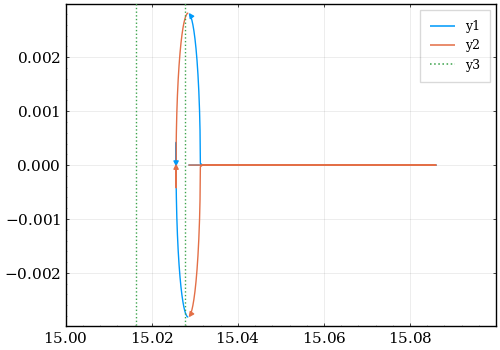

In [35]:
let
    m1,m2,m3,m4=mDn,mDsc,mDc,mDsn
    mπ=mπn
    
    function gunc(x;z=0.0)
        s=x[1]+im*x[2]
        psq1,psq2=λ(s,m3^2,m4^2)/(4*s),λ(s,m1^2,m2^2)/(4*s)
        tmp=sqrt(λ(s,m3^2,m4^2)*λ(s,m1^2,m2^2)+im*eps())/(2*s)
        res=sqrt(s+im*eps())-sqrt(m3^2+psq1+im*eps())-sqrt(m1^2+psq2+im*eps())-sqrt(mπ^2+psq1+psq2+tmp*z)
        reim(res)
    end
    
    function gunc_conj(x;z=0.0)
        s=x[1]-im*x[2]
        psq1,psq2=λ(s,m3^2,m4^2)/(4*s),λ(s,m1^2,m2^2)/(4*s)
        tmp=sqrt(λ(s,m3^2,m4^2)*λ(s,m1^2,m2^2)+im*eps())/(2*s)
        res=sqrt(s+im*eps())-sqrt(m3^2+psq1+im*eps())-sqrt(m1^2+psq2+im*eps())-sqrt(mπ^2+psq1+psq2+tmp*z)
        reim(res)
    end
    
    function s_root(z)
        _sol=nlsolve(x->gunc(x;z=z),[(m1+m2)^2,0.0])
        _sol.residual_norm < 1e-8 ? complex(_sol.zero[1], _sol.zero[2]) : NaN+1im*NaN
    end
    
    function s_root_conj(z)
        _sol=nlsolve(x->gunc_conj(x;z=z),[(m1+m2)^2,0.0])
        _sol.residual_norm < 1e-8 ? complex(_sol.zero[1], _sol.zero[2]) : NaN+1im*NaN
    end
    
#     s_root(-1)-(m1+m2)^2|>println
    
    zv=collect(-1:0.001:1.0)
    cv=s_root.(zv)
    cv_conj=s_root_conj.(zv)
    plot(real.(cv),imag.(cv),arrow=true,xlims=(15,15.1))
    plot!(real.(cv_conj),imag.(cv_conj),arrow=true,xlims=(15,15.1))
    vline!([(mDn+mDsc)^2,(mDc+mDsn)^2],ls=:dot)
end

-0.0006147624232095694 + 4.4268673083298337e-16im


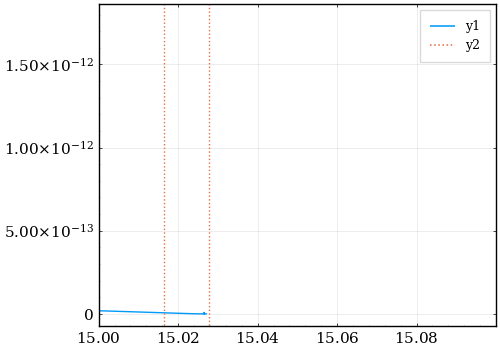

In [36]:
let
    m1,m2,m3,m4=mDc,mDsn,mDc,mDsn
    mπ=mπc
    
    function gunc(x;z=0.0)
        s=x[1]+im*x[2]
        psq1,psq2=λ(s,m3^2,m4^2)/(4*s),λ(s,m1^2,m2^2)/(4*s)
        tmp=sqrt(λ(s,m3^2,m4^2)*λ(s,m1^2,m2^2)+im*eps())/(2*s)
        res=sqrt(s+im*eps())-sqrt(m3^2+psq1+im*eps())-sqrt(m1^2+psq2+im*eps())-sqrt(mπ^2+psq1+psq2+tmp*z)
        reim(res)
    end
    
    function s_root(z)
        _sol=nlsolve(x->gunc(x;z=z),[(m1+m2)^2,0.0])
        _sol.residual_norm < 1e-8 ? complex(_sol.zero[1], _sol.zero[2]) : NaN+1im*NaN
    end
    
    s_root(-1)-(m1+m2)^2|>println
    
    zv=collect(-1:0.001:1.0)
    cv=s_root.(zv)
    plot(real.(cv),imag.(cv),arrow=true,xlims=(15,15.1))
    vline!([(mDn+mDsc)^2,(mDc+mDsn)^2],ls=:dot)
end

# $D_1 D^*$

In [48]:
mD1-mDs-mπ_av

0.2753511333333335

176.05331631566793 - 6.492721447929659e-14im


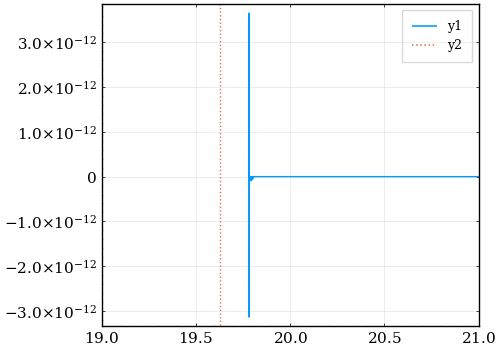

In [50]:
let
    m1,m2,m3,m4=mDs,mD1,mDs,mD1
    mπ=mπ_av
    
    function gunc(x;z=0.0)
        s=x[1]+im*x[2]
        psq1,psq2=λ(s,m3^2,m4^2)/(4*s),λ(s,m1^2,m2^2)/(4*s)
        tmp=sqrt(λ(s,m3^2,m4^2)*λ(s,m1^2,m2^2)+im*eps())/(2*s)
        res=sqrt(s+im*eps())-sqrt(m3^2+psq1+im*eps())-sqrt(m1^2+psq2+im*eps())-sqrt(mπ^2+psq1+psq2+tmp*z)
        reim(res)
    end
    
    function s_root(z)
        _sol=nlsolve(x->gunc(x;z=z),[(m1+m2)^2,0.0])
        _sol.residual_norm < 1e-8 ? complex(_sol.zero[1], _sol.zero[2]) : NaN+1im*NaN
    end
    
    s_root(-1)|>println
    
    zv=collect(-1:0.001:1.0)
    cv=s_root.(zv)
    plot(real.(cv),imag.(cv),arrow=true,xlims=(19,21))
    vline!([(mD1+mDs)^2],ls=:dot)
end